<h1>PAD - Assignment 2</h1>

<h2>Multiclass Classification - OVR & OVO</h2>

<h3>Roshan Srivastava <br>  J047 <br>  MBA Tech. EXTC SEM 7</h3>

<h1>Part 1: One vs. All</h1>

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
X,y = make_classification(n_samples =  1000, n_features = 10, n_informative=5, n_redundant= 5, n_classes = 3, random_state=1) #creating dataset

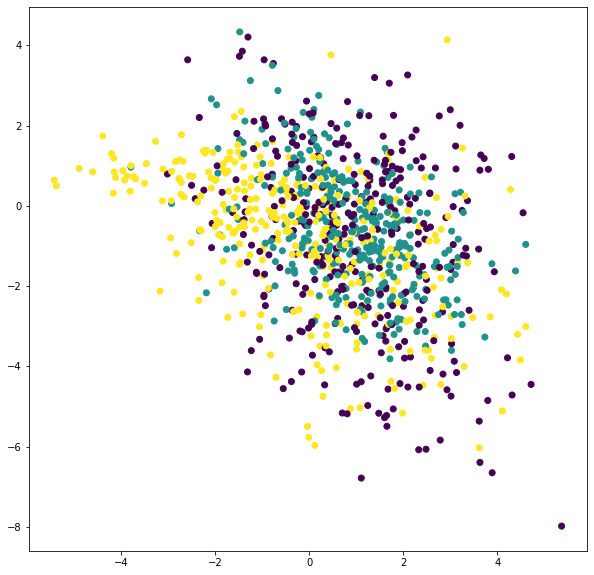

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y) #plotting only 2 classes for simplicity

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
model = LogisticRegression(multi_class='ovr') #initializing one vs all classifier
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        60
           1       0.61      0.60      0.60        62
           2       0.76      0.65      0.70        78

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



In [ ]:
data = load_wine() #loading wine dataset from sklearn and dividing into X and y
X = data.data
y = data.target

In [ ]:
print(data.target_names) #viewing number of classes
print(X.shape) #viewing number of entries and features
print(data.feature_names) #viewing all 13 features

['class_0' 'class_1' 'class_2']
(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
model = OneVsRestClassifier(SVC())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6944444444444444
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.55      0.92      0.69        13
           2       0.00      0.00      0.00         9

    accuracy                           0.69        36
   macro avg       0.49      0.62      0.54        36
weighted avg       0.56      0.69      0.61        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>Part 2: One vs. One</h1>

In [2]:
#Implementing One vs One Classification
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,n_classes=3,random_state=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
model = SVC(decision_function_shape='ovo')

In [ ]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        60
           1       0.98      0.89      0.93        62
           2       0.96      0.90      0.93        78

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.91      0.91       200



In [ ]:
dataset = load_wine()
x = dataset["data"]
y = dataset['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)
model = OneVsOneClassifier(SVC())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.79      0.73      0.76        15
           2       0.60      0.67      0.63         9

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



<h1>Part 3: Ensemble of Experts</h1>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
import numpy as np

In [11]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [13]:
def getModels():
    models = {}
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [15]:
def model_eval(model,x,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores = cross_val_score(model,x,y,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
    return scores

In [16]:
models = getModels()

In [17]:
result={}
for name,model in models.items():
    scores = model_eval(model,x,y)
    result[name] = scores
    print(f"{name}: Mean: {np.mean(scores):.3f}; Std. Dev: {np.std(scores):.3f}")

lr: Mean: 0.773; Std. Dev: 0.040
knn: Mean: 0.717; Std. Dev: 0.040
cart: Mean: 0.694; Std. Dev: 0.057
svm: Mean: 0.757; Std. Dev: 0.040
bayes: Mean: 0.759; Std. Dev: 0.055


In [18]:
ensemble = VotingClassifier(estimators=[('LR',LogisticRegression()),('KNN',KNeighborsClassifier()),('CART',DecisionTreeClassifier()),("SVC",SVC()),("Naive Bayes",GaussianNB())])
ensemble.fit(x_train,y_train)

C:\RoshanSrivastava\Coding\SEM7\PAD\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('CART', DecisionTreeClassifier()), ('SVC', SVC()),
                             ('Naive Bayes', GaussianNB())])

In [19]:
y_pred = ensemble.predict(x_test)
print(f'Ensemble Log Loss: {log_loss(y_test,y_pred):.3f}')

Ensemble Log Loss: 8.747


<h1>Part 4: Ensemble by Stacking</h1>


In [20]:
from sklearn.ensemble import StackingClassifier
l0 = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('CART', DecisionTreeClassifier()), ('SVC', SVC()),('Naive Bayes', GaussianNB())]
l1 = LogisticRegression()
model = StackingClassifier(estimators=l0,final_estimator=l1,cv=5)

In [22]:
results = {}
models = getModels()
for name,model in models.items():
    scores = model_eval(model,x,y)
    results[name]=scores
    print(f"{name}: Mean: {np.mean(scores):.3f}; Std. Dev: {np.std(scores):.3f}")

lr: Mean: 0.773; Std. Dev: 0.040
knn: Mean: 0.717; Std. Dev: 0.040
cart: Mean: 0.695; Std. Dev: 0.057
svm: Mean: 0.757; Std. Dev: 0.040
bayes: Mean: 0.759; Std. Dev: 0.055


In [23]:
scores = model_eval(model,x,y)
print(f"Stacking: Mean: {np.mean(scores):.3f}; Std. Dev: {np.std(scores):.3f}")

Stacking: Mean: 0.759; Std. Dev: 0.055
